<a href="https://colab.research.google.com/github/scsanjay/ml_from_scratch/blob/main/09.%20KNN%20Regression/KnnRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Implementation of KNN Regression

In [ ]:
import numpy as np

In [ ]:
class KnnRegression:
  """
  k-nearest neighbors regression looks at it's neighbors to predict 
  output for a query point.

  Parameters
  ----------
  n_neighbors : int, default=5
      Number of nearest neighbors to look at for predicting.
  
  weights : {'uniform', 'distance'}, default='uniform'
      uniform gives equal importance to each neighbors.
      distance gives more importance to closer neighbor, importance = 1/distance.
  
  p : int, default=2
      It is parameter for the minkowski distance (lp distance). It is used only
      when metric=minkowski.

  metric : {'minkowski', 'manhattan', 'euclidean'}, default='minkowski'
      The distance metric used to check for neighbors. The default is minkowski
      with p=2 which is equivalent to euclidean.

  Attributes
  ----------
  n_samples_fit_ : int
      It gives number of train data fitted.
  """

  def __init__(self, n_neighbors=5, weights='uniform', p=2, metric='minkowski'):
    self.n_neighbors = n_neighbors
    self.weights = weights
    self.metric = metric
    self.p = p

  def fit(self, X, y):
    """
    Fit the training data to the model.

    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        The training data.

    y : array-like of shape (n_samples,)
        The target outputs.

    Returns
    -------
    self
    """

    # save train data
    self.X_train = np.array(X)
    self.y_train = np.array(y)
    # set no. of train data
    self.n_samples_fit_ = len(self.X_train)
    return self

  def predict(self, X):
    """
    Predict the outputs of test data.

    Parameters
    ----------
    X : array-like of shape (n_queries, n_features)
        The testing data.

    Returns
    -------
    y : array-like of shape (n_queries,)
        The target outputs of test data.
    """

    X_test = np.array(X)
    y_pred = []
    # loop over each test data
    for test_data in X_test:
      # calculate distances between test data and all the train data
      distances = self._getDistances(test_data)
      # get k sorted indices based on distance
      distance_indices = np.argsort(distances)[:self.n_neighbors]
      # get output based on weight and distance
      if self.weights == 'uniform':
        # get outputs of k nearest points
        outputs = self.y_train[distance_indices]
        # calculate mean
        output = np.mean(outputs)
      else:
        # calculate weights for each outputs
        output_weight = 0
        total_weight = 0
        for distance_index in distance_indices:
          distance = distances[distance_index]
          weight = 1/distance
          total_weight += weight
          output = self.y_train[distance_index]
          output_weight += weight*output

        output = output_weight/total_weight
      #save the output
      y_pred.append(output)
    # return predicted outputs
    return np.array(y_pred)
  
  def kneighbors(self, X):
    """
    Return the distances and the k nearest neighbors indices.

    Parameters
    ----------
    X : array-like of shape (n_queries, n_features)
        The testing data.

    Returns
    -------
    (distance, neighbors) : tuple of array-like of shape (n_queries, k) each
        distance is the distance of each point from the query points.
        neighbors is represents the indices of neighbors in train data.
    """

    X_test = np.array(X)
    neighbor_indices = []
    neighbor_distances = []
    # loop over each test data
    for test_data in X_test:
      # calculate distances between test data and all the train data
      distances = self._getDistances(test_data)
      # get k sorted indices based on distance
      distance_indices = np.argsort(distances)[:self.n_neighbors]
      # append indices of the neighbors
      neighbor_indices.append(distance_indices)
      # append distance of the neighbors
      neighbor_distances.append(distances[distance_indices])
    # return (distance, neighbors)
    return (np.array(neighbor_distances), np.array(neighbor_indices))

  def _getDistances(self, test_data):
    if self.metric == 'euclidean':
      p = 2
    elif self.metric == 'manhattan':
      p = 1
    else:
      p = self.p
    # implement the distance calculation
    distances = np.power(np.sum(np.power(np.abs(test_data-self.X_train), p), axis=1), 1/p)
    return distances
  

##Testing the validity of implementation by comparing with **sklearn.neighbors.KNeighborsClassifier**

In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_boston()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, train_size=.8)

stnd = StandardScaler()
stnd.fit(X_train)
X_train = stnd.transform(X_train)
X_test = stnd.transform(X_test)

In [ ]:
model = KnnRegression(n_neighbors=5, weights='distance', metric='manhattan')
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
import seaborn as sns

In [ ]:
r2_score(y_test, y_pred)

0.8494639568336997

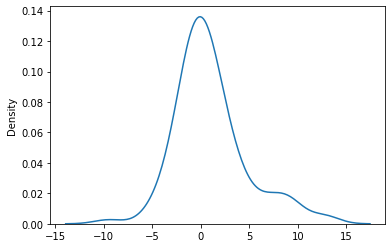

In [ ]:
sns.kdeplot(y_test - y_pred)

**R2 score is close to 1 so that's good. Distribution of errors is gaussian distributed with mean 0 so that's good too.**